# Volatility Surface and Option Price Exploration
This notebook visualizes the 3D volatility surface and 2D price over strike for all options across all dates in the `data` folder.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Load and Combine Data
Load all CSV files from the `data` folder and combine them into a single DataFrame.

In [ ]:
data_folder = '../data'
all_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
data_frames = []

for file in all_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    df['Date'] = file.split('.')[0]  # Extract date from filename
    data_frames.append(df)

combined_data = pd.concat(data_frames, ignore_index=True)

# Extract maturity from the filename in MMDDYY format
def extract_maturity_from_filename(filename):
    month = int(filename[:2])
    day = int(filename[2:4])
    year = 2000 + int(filename[4:6])
    return pd.Timestamp(year, month, day)

# Apply the function to extract maturity
combined_data['Maturity_Date'] = combined_data['Source'].apply(lambda x: extract_maturity_from_filename(x.split('.')[0]))

# Calculate time to maturity in years
reference_date = pd.Timestamp('2025-04-26')
combined_data['Maturity'] = (combined_data['Maturity_Date'] - reference_date).dt.days / 365

## 3D Volatility Surface
Visualize the implied volatility surface as a 3D plot.

ValueError: time data "data" doesn't match format "%m%d%y", at position 13. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

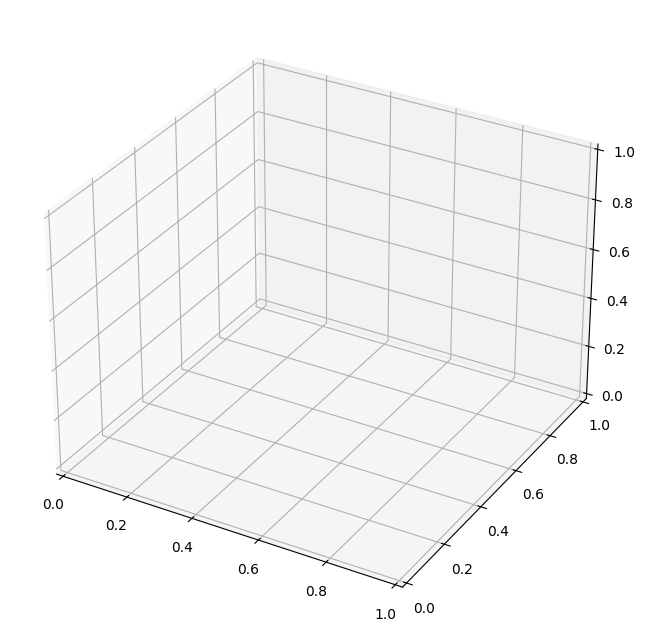

In [ ]:
# Extract relevant data
strikes = combined_data['Strike']
maturities = combined_data['Maturity']
vols = combined_data['IV_Call']

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(strikes, maturities, vols, cmap='viridis', edgecolor='none')
ax.set_xlabel('Strike Price (K)')
ax.set_ylabel('Maturity (T)')
ax.set_zlabel('Implied Volatility')
ax.set_title('3D Volatility Surface')
plt.show()

## 2D Price Over Strike
Visualize the option prices over strike prices for all dates.

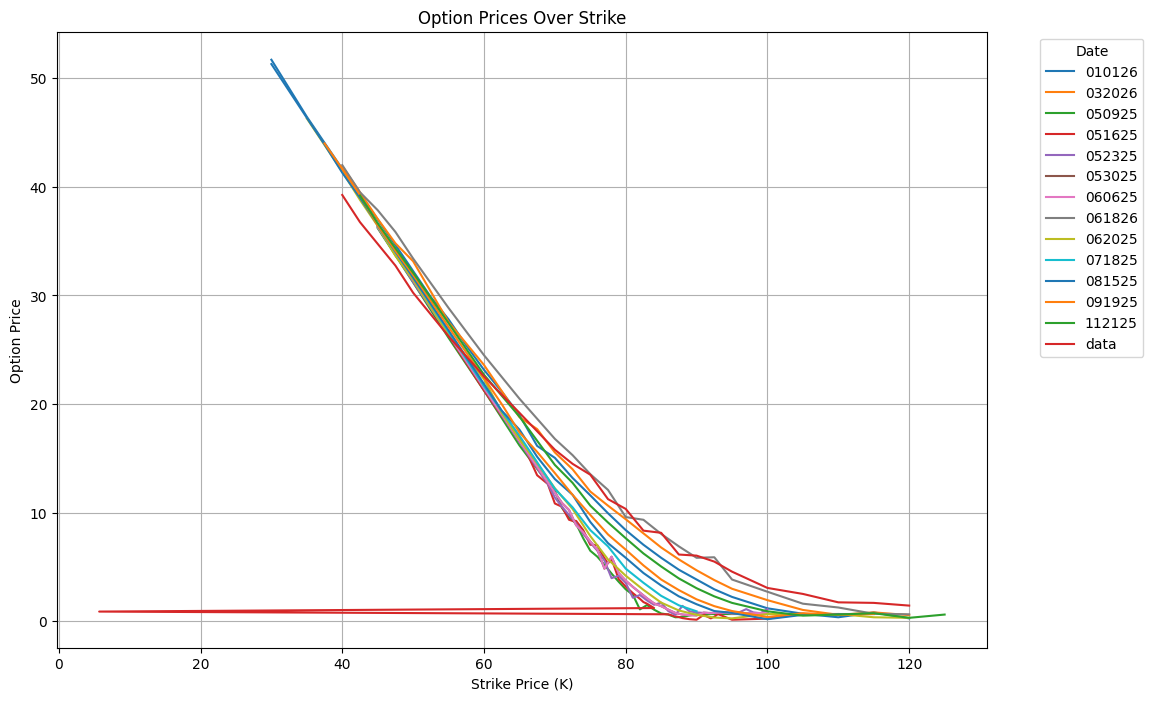

In [4]:
plt.figure(figsize=(12, 8))

# Extract relevant data
for date, group in combined_data.groupby('Date'):
    mid_prices = (group['Bid_Call'] + group['Ask_Call']) / 2
    plt.plot(group['Strike'], mid_prices, label=date)

plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('Option Prices Over Strike')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()